<a href="https://colab.research.google.com/github/BrendaChepkoech/Hypothyroidism-Project/blob/main/Brenda_Chepkoech%2Cweek_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Project

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Being able to build an accurate model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees

Part 2: Support Vector Machine(SVM)

### c) Understanding the context 

Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Nairobi Hospital conducted a clinical camp to test for hypothyroidism.The data collected focused on Thyroid patients. 

- The Levothyroxine (T4) and Triiodothyronine (T3) hormones are produced by the thyroid gland and they play major role in converting nutrients into energy and thereby help in regulating body temperature, brain function and even the heart rate.
- The amount of T3 and T4 hormones in the blood is controlled by the Thyroid Stimulating Hormone (TSH). 
- There are different thyroid function tests such as TSH, T3, T4U, Total T4 and Free T4 Index (FTI) that are done to assess the various functions related to the thyroid gland. 
- A low TSH and low T4 indicate secondary hypothyroidism while a high TSH and low T4 indicate primary hypothyroidism. 
- T3 tests are used for determining the severity of the hyperthyroidism or to diagnose the hyperthyroidism.

### d) Recording the Experimental Design

- Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Find and deal with anomalies, and missing data within the dataset. 
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Implement the solution by building models that can predict whether a patient has hypothyroidism or not.
- For this section, we will build a model using the advanced decision trees such as Ada boost and/or the Gradient boosted trees and afterwards evaluate their performance
- Also, apply Polynomial, sigmoid and rbf kernel functions to build your SVM model and then evaluate their performance
- Give recommendations on which model is the best in predicting whether a person has hypothyroidism or not.

### e) Data Relevance

The data is relevant since we have all the features that will help us predict whether a patient has hyperthyrodism or not

Dataset link http://bit.ly/hypothyroid_data

**Dataset Columns**

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

## 2. Reading the Data

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Dataset
df=pd.read_csv("/content/hypothyroid.csv")


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape
#our dataset has 3163 columns and 26 columns

(3163, 26)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
#column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## 5. Tidying the Dataset

In [ ]:
# Checking for duplicates
#
df.duplicated().sum()
#We shall drop duplicates

77

We shall drop the duplicates in nour dataset

In [ ]:
#dropping dupicates
df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [ ]:
# Checking for Anomalies
#
df[['status','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']].nunique()
#Check the different classes in the different colums

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
#After exploring the data I realized that there are some "?" in some columns
#we shall replace the ? with NaN so that it can be converted to  null values
df.replace("?",np.NaN,inplace=True)

In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Text(0.5, 1.0, 'Missing Values')

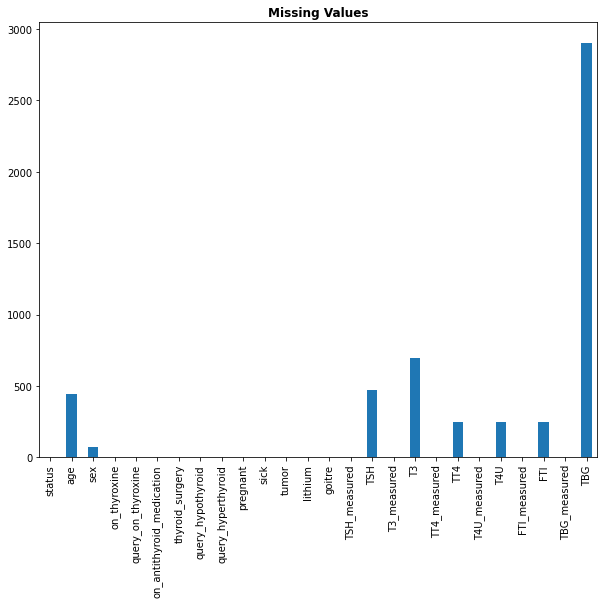

In [ ]:
#Lets vizualize the missing values
plt.figure(figsize=(10,8))
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values",weight="bold")

TBG has the highest number of null values so we shall drop the column 
We shall TGB measured since wre are dropping TGB which measures the level of a protein that moves thyroid hormone throughout your body. This protein is called thyroxine binding globulin (TBG). 

In [ ]:
#drop the 'TBG' column because it has alot of missing values(almost 90% of the data is null)
#I also dropped TBG_measured because its related to 'TBG' 
df.drop(['TBG_measured','TBG'],1, inplace=True)

In [ ]:
#while checking the data, i realized that the data type for each column was  object type
#We shall convert the numerical columns to numerical data types
#numerical_columns = df['age','TSH','T3','T4U','FTI','TT4']
df["age"]=pd.to_numeric(df["age"])
df['TSH']=pd.to_numeric(df['TSH'])
df['TT4']=pd.to_numeric(df['TT4'])
df['T3']=pd.to_numeric(df['T3'])
df['FTI']=pd.to_numeric(df['FTI'])
df['T4U']=pd.to_numeric(df['T4U'])

In [ ]:
#Dealing with null values

#We shall fill the null values with mode for categorical and median for numerical
#columns with null values = ['age', 'sex', 'TSH',"T3",'T4U', 'FTI', 'TT4']
df['age'].fillna(df['age'].median(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
df['TSH'].fillna(df['TSH'].median(),inplace=True)
df["T3"].fillna(df["T3"].median(),inplace=True)
df['T4U'].fillna(df['T4U'].median(),inplace=True)
df['FTI'].fillna(df['FTI'].median(),inplace=True)
df['TT4'].fillna(df['TT4'].median(),inplace=True)

In [ ]:
#confirming that there are no null values
df.isnull().sum().sum()

0

## 6. Exploratory Analysis

## Univariate Analysis

In [ ]:
#Categorical variables
#Frequecy table for status
df["status"].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

Hypothyroid means one has the disease and negative means one do not have.
Majority of the people tested do not have hypothyroid disorder.

In [ ]:
#Frequency table for  sex
df["sex"].value_counts()

F    2255
M     908
Name: sex, dtype: int64

The largest number of patients who were tested for Hypothyroidism was Female. theis is because Hypothyroidism is most prevalent in women than in men.

In [ ]:
#Frequency table for  on_thyroxine
df["on_thyroxine"].value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

Most of the patients were tested on thyroxine

In [ ]:
#Frequency table for goitre
df["goitre"].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

More that 3000 patients were tested whetherv they have goitre or not

In [ ]:
#Frequency table for TSH_measured
df["TSH_measured"].value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

More than 2500 patrients were tested on TSH

In [ ]:
#Frequency table for T3_measured
df["T3_measured"].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

More than 2000 patrients were tested on T3

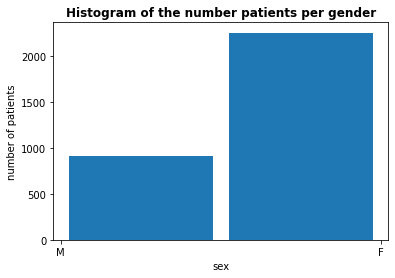

In [ ]:
#Histogram for sex of the patients who went to the hospital
sex=df["sex"]
plt.hist(sex,histtype='bar',bins=2, rwidth=0.9)
plt.xlabel("sex")
plt.ylabel("number of patients")
plt.title('Histogram of the number patients per gender',weight="bold")
plt.show()

There were more female patients than male patients. 

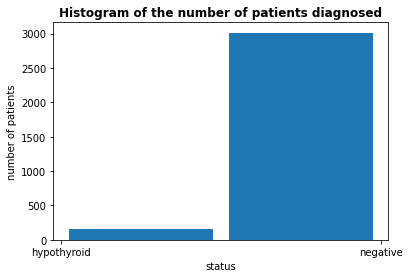

In [ ]:
#Histogram for status of whether a patient was diagnosed with or not
status=df["status"]
plt.hist(status,histtype='bar',bins=2, rwidth=0.9)
plt.xlabel("status")
plt.ylabel("number of patients")
plt.title('Histogram of the number of patients diagnosed',weight="bold")
plt.show()


Very few patients were dignosed with hypothyroid compared to the ones who turen negative

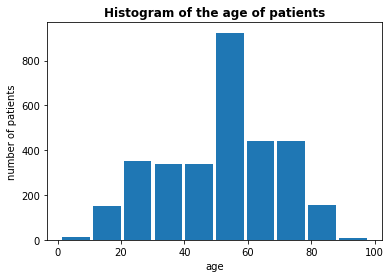

In [ ]:
#Histogram for status of whether a patient was diagnosed with or not
age=df["age"]
plt.hist(age,histtype='bar',bins=10, rwidth=0.9)
plt.xlabel("age")
plt.ylabel("number of patients")
plt.title('Histogram of the age of patients',weight="bold")
plt.show()

The laegest number of patients who tested for hypothyrodism were from the age group of 56 to 60 yrs.
Elderly suffer with hypothyroid disorder. Hypothyroidism is more common among elderly individuals due to the increasing incidence and prevalence of autoimmune thyroiditis that occurs with aging.

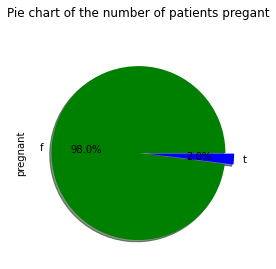

In [ ]:
#pie chart for pregnant
df["pregnant"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['green',"blue"], autopct='%1.1f%%')
plt.title("Pie chart of the number of patients pregant", y=1.1)
plt.show()

2% of the patients were pregnant when the test was carried out.
98% were not pregnant

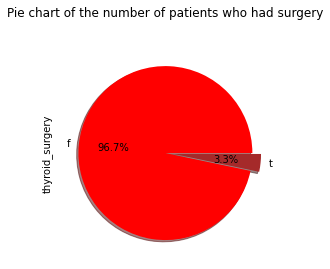

In [ ]:
#pie chart for thyroid_surgery
df["thyroid_surgery"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['red',"brown"], autopct='%1.1f%%')
plt.title("Pie chart of the number of patients who had surgery", y=1.1)
plt.show()

3.3 % of the patient underwent thyroid_surgery whereas 96.7 % did not undergo surgery

In [ ]:
#Numerical variables

 #Measures of Central tendency
 #Mode
df.mean() 

age     51.555485
TSH      5.150354
T3       1.909042
TT4    108.468195
T4U      0.976772
FTI    114.741985
dtype: float64

The average age of the patients wa 51

In [ ]:
#median
df.median()

age     54.00
TSH      0.70
T3       1.80
TT4    104.00
T4U      0.96
FTI    107.00
dtype: float64

In [ ]:
#Mode
numerical_data=df[['age','TSH','T3','T4U','FTI','TT4']]
numerical_data.mode()

,age,TSH,T3,T4U,FTI,TT4
0,54.0,0.0,1.8,0.96,107.0,104.0


In [ ]:
# Measures of dispersion
#standard deviation
df.std()

age    17.909384
TSH    22.137871
T3      0.882341
TT4    43.677305
T4U     0.217568
FTI    57.882814
dtype: float64

In [ ]:
#kurtosis
df.kurt()

age     -0.621428
TSH    179.075313
T3      14.211499
TT4      7.846341
T4U      3.981455
FTI     51.540596
dtype: float64

In [ ]:
#skewness
df.skew()

age    -0.241177
TSH    11.061752
T3      2.490112
TT4     1.595531
T4U     0.973771
FTI     5.339621
dtype: float64

In [ ]:
# Quantiles
df.quantile([0.25,0.50,0.75])

,age,TSH,T3,TT4,T4U,FTI
0.25,38.0,0.0,1.5,85.0,0.86,92.0
0.50,54.0,0.7,1.8,104.0,0.96,107.0
0.75,64.0,1.8,2.2,124.0,1.05,126.0


In [ ]:
# Range
numerical_data=df[['age','TSH','T3','T4U','FTI','TT4']]
max = numerical_data.max()
min = numerical_data.min()
range = max - min
range

age     97.00
TSH    530.00
T3      10.20
T4U      2.21
FTI    881.00
TT4    448.00
dtype: float64

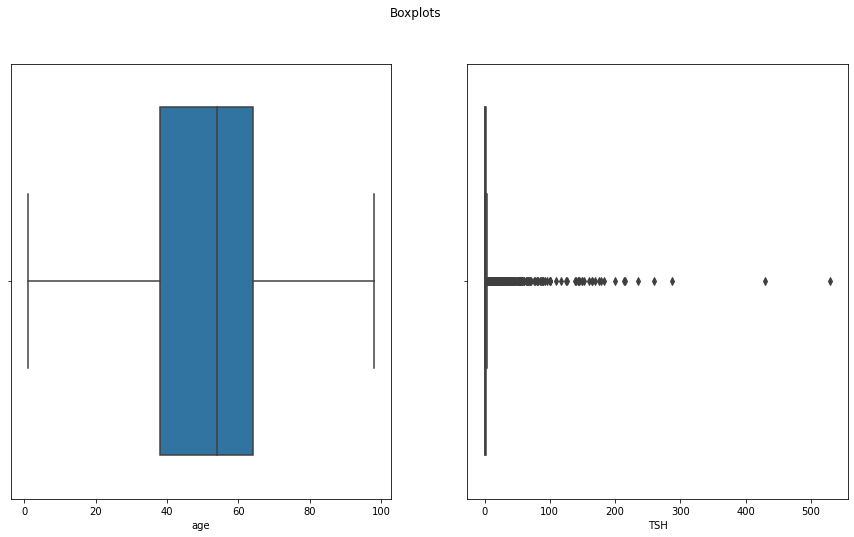

In [ ]:
# Checking for outliers in the age,TSH column
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['TSH'], ax=axes[1])
plt.show()

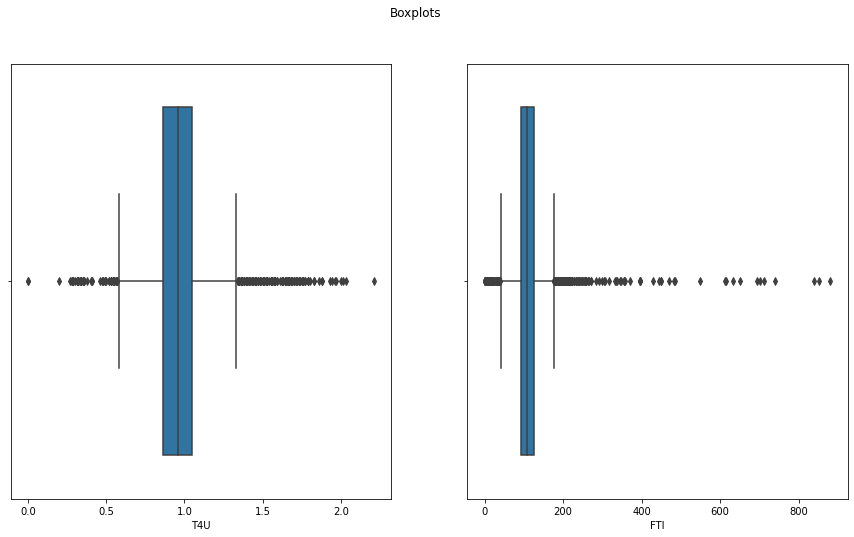

In [ ]:
# Checking for outliers in the T4U,T3 column
fig, axes=plt.subplots(1,2, figsize=(15, 8))
fig.suptitle("Boxplots")
sns.boxplot(df["T4U"], ax=axes[0])
sns.boxplot(df["FTI"], ax=axes[1])
plt.show()
    

We can conclude that there are outliers in our numerical columns but it would be irresponsible to drop them because it will distort our data and tamper with our analysis and predictions.

## Bivariate Analysis

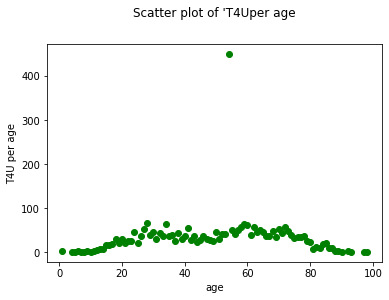

In [ ]:
# Plotting our scatterplot FOR age against T4U

nc=df.groupby('age')['T4U'].sum().reset_index(name='T4Uper age')
nc
plt.scatter(nc["age"] , nc['T4Uper age'], c='g')
plt.xlabel("age")
plt.ylabel("T4U per age")
plt.title("Scatter plot of 'T4Uper age", y=1.1)
plt.show()
#we can see that as the age rises, the T4U increases but T4U starts to drop from age 65

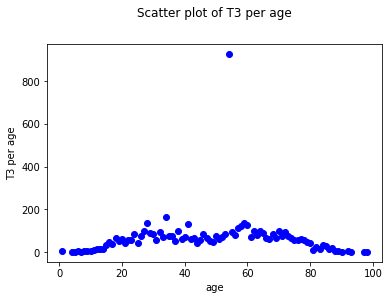

In [ ]:
#scatter plot for age agaist T3
nc=df.groupby('age')['T3'].sum().reset_index(name='T3 per age')
nc
plt.scatter(nc["age"] , nc['T3 per age'], c='b')
plt.xlabel("age")
plt.ylabel('T3 per age')
plt.title("Scatter plot of T3 per age", y=1.1)
plt.show()
#we can see that as the age rises, the T3 increases but T4U starts to drop from age 65

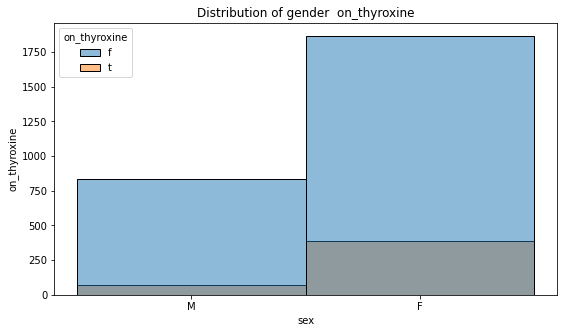

In [ ]:
#Stacked column chart for sex agaist on_thyroxine
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["on_thyroxine"])
plt.xlabel('sex')
plt.ylabel('on_thyroxine')
plt.title('Distribution of gender  on_thyroxine') 
plt.show()
#From the stacked column chart, we can see that there were more female patients who were tested on_thyroxine 

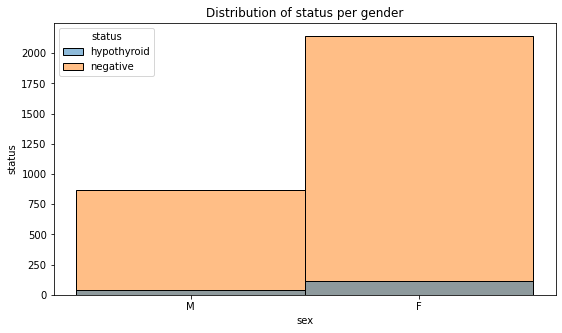

In [ ]:
#stacked column chart for status agaist sex
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["status"])
plt.xlabel("sex")
plt.ylabel('status')
plt.title('Distribution of status per gender') 
plt.show()
#from the chart we can see that most of the patients status was negative but 
#more females were diagnosed with hypothyroism compared to male patients

In [ ]:
#frequecy table for sex vs on_antithyroid_medication
df[["sex","on_antithyroid_medication"]].value_counts(sort = False)

sex  on_antithyroid_medication
F    f                            2222
     t                              33
M    f                             899
     t                               9
dtype: int64

More female than men were  on on_antithyroid_medication

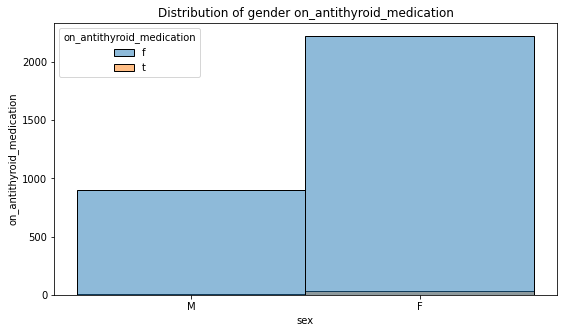

In [ ]:
#Stacked column for sex vs patients on_antithyroid_medication
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["on_antithyroid_medication"])
plt.xlabel('sex')
plt.ylabel('on_antithyroid_medication')
plt.title('Distribution of gender on_antithyroid_medication') 
plt.show()
#we can see that more female patients are on_antithyroid_medication compared to male patients

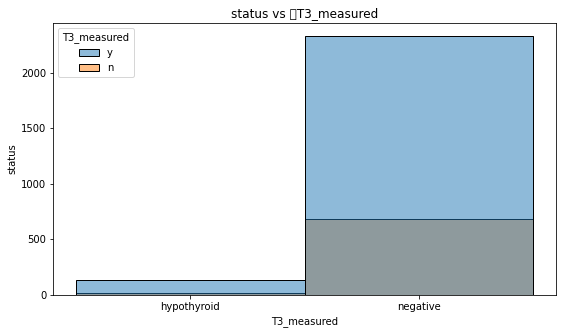

In [ ]:
#stacked column for status vs T3_measured
plt.figure(figsize=(9, 5))
sns.histplot(x = df["status"], hue = df["T3_measured"])
plt.xlabel('T3_measured')
plt.ylabel('status')
plt.title('status vs 	T3_measured') 
plt.show()



In [ ]:
# Z-test for age of the patients 
from scipy import stats
p_age= df['age']
age_zscore = stats.zscore(p_age)

print("The zscore for Respondents Age is:  n/",age_zscore)

The zscore for Respondents Age is:  n/ [ 1.14173367 -2.04145851 -1.53884922 ...  1.42096106  1.25342463
  0.24820604]


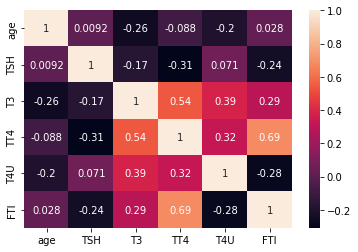

In [ ]:
#correlation using heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()


Coefficient of one accross the diagonal shows that a variable perfectly correlates to itself


## 7. Implementing the Solution

In [ ]:
# FEATURE ENGINEERING
# 
#installing category encoder
!pip install category_encoders

     |████████████████████████████████| 82 kB 309 kB/s 


In [ ]:
#start by creating a subset of numerical data so that I separate them from categorical data
df1 = df[['age','TSH','T3','TT4','T4U','FTI']]
df.drop(['age','TSH','T3','TT4','T4U','FTI'],axis=1,inplace=True)
# import category encoders

import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)
df = encoder.fit_transform(df)
df.head(2)

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#concatinate the two tables
df2 = pd.concat([df,df1],axis=1)
#df2.head(4)
df2.shape

(3163, 24)

## Random Forest Classifier

In [ ]:
#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Building the model
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print("The accuracy of  random forest classifier is: ", accuracy_score(y_test,y_pred)*100)


Confussion Matrix : 
 [[ 33   6]
 [  5 905]]
The accuracy of  random forest classifier is:  98.840885142255


The accuracy of the RFC is 98.84% which is not bad.

From the classification matrix 33+905 were predicted correctly and 5+6 were not predicted correctly

We shall do hyperparameter tuning so that we can fit the model with the best parameters so that we can check the accuracy

In [ ]:
#Hyperparameter tuning
parameters= { 'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
# Run the grid search to get the best parameters
search=GridSearchCV(forest,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}


In [ ]:
# Building the model after identifying the best parameters
forest = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features = 'sqrt',min_samples_leaf= 1, min_samples_split=2, n_estimators = 9)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print("The accuracy of  random forest classifier is: ", accuracy_score(y_test,y_pred)*100)

Confussion Matrix : 
 [[ 33   6]
 [  7 903]]
The accuracy of  random forest classifier is:  98.63013698630137


After tuning the parameters the accuracy dropped by -0.2% to 98.63%

From the accuracy score (33+903) were predicted correctly and (6+7) were not predicted correctly

### Ada boosted trees

In [ ]:
#Building our adaboost model
ada_boost = AdaBoostClassifier()

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)
#making predictions using our model
y_pred_ada = ada_boost.predict(X_test)
#checking the accuracy of our model
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_ada))

Accuracy: 98.52476290832455
Confusion matrix  
 [[ 33   6]
 [  8 902]]


The accuracy of the model is 98.52% 

From the confusion matrix, we can see that (33+902) were predicted correcly and (6+8) were not predicted correctly

### Gradient boosted trees

In [ ]:
#gradient boosting
model = GradientBoostingClassifier()
#training our model
model = model.fit(X_train, y_train)
#making preductions
y_pred_gbr = model.predict(X_test)

#The accuracy of the model
print('GB Accuracy is  ', metrics.accuracy_score(y_test,y_pred_gbr)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_gbr))

GB Accuracy is   98.41938883034773
Confusion matrix  
 [[ 34   5]
 [ 10 900]]


Gradient boosting model has a higher accuracy compared to the ada boosted model with an accuracy of 98.41%

From the confusion matrix (34+900) was predicted correctly



After analyzing the adaboost trees, its clear that the ada boosted tree has  the highest accuracy score as compared to the gradient boosted tree though the margin is not huge.

We shall do hyperparameter tuning on the adaboost so that we can get the best accuracy

In [ ]:
#hyperparameter tuning
parameters={'n_estimators': [100,200,300]}
# Run the grid search to get the best parameters
search=GridSearchCV(ada_boost,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'n_estimators': 100}


In [ ]:
# identify the important featues
feature_imp = pd.Series(ada_boost.feature_importances_,\
                        index=X_train.columns).sort_values(ascending=False)
print('important features \n',feature_imp)

important features 
 FTI                          0.22
TSH                          0.18
age                          0.16
TT4                          0.14
T3                           0.08
T4U                          0.08
on_antithyroid_medication    0.06
on_thyroxine                 0.04
T3_measured                  0.02
thyroid_surgery              0.02
pregnant                     0.00
query_on_thyroxine           0.00
query_hypothyroid            0.00
query_hyperthyroid           0.00
goitre                       0.00
sick                         0.00
tumor                        0.00
lithium                      0.00
TSH_measured                 0.00
TT4_measured                 0.00
T4U_measured                 0.00
FTI_measured                 0.00
sex                          0.00
dtype: float64


Important features are 

 FTI                          
TSH                          
age                          
TT4                          
T3                          
T4U                         
on_antithyroid_medication 
on_thyroxine                
T3_measured                  
thyroid_surgery            

In [ ]:
#run ada boost  model with important features

X = df2[['FTI','TT4','TSH','age','T3','on_thyroxine','on_antithyroid_medication','T4U','T3_measured',"thyroid_surgery"]]
y = df2['status']

#set train,test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8,random_state=42)


#Building our adaboost model
ada_boost = AdaBoostClassifier(n_estimators = 100)

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)
#making predictions using our model
y_pred_ada = ada_boost.predict(X_test)
#checking the accuracy of our model
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_ada))

Accuracy: 99.0521327014218
Confusion matrix  
 [[ 32   5]
 [  1 595]]


After fitting the model with the best parameter and the best features the accuracy increased to 99.05%

From the confusion matrix, 32+595 were predicted correctly and 1+5 were not predicted correctly,.

## 8. Support Vector Machines(SMV)

### Polynomial SVM

In [ ]:
#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

#splittig the data into train and test set
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Hyperparameter tuning

model = SVC(kernel='poly')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 10, 'degree': 4, 'gamma': 0.0001}


In [ ]:
# Building a polynomial model 
polyclassifier = SVC(kernel='poly',degree=4,C=10, gamma=0.0001)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

#Making predictions
y_pred=polyclassifier.predict(X_test)

In [ ]:
#model evalutaion
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  97.74703557312253
[[  94   20]
 [  37 2379]]


### Radial basis function (rbf)model

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='rbf')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 10, 'degree': 3, 'gamma': 0.0001}


In [ ]:
# Building a polynomial model 
model_rbf= SVC(kernel='rbf',degree=3,C=10, gamma=0.0001)
# Training the model using the training set
model_rbf.fit(X_train, y_train)

#Making predictions
y_pred=model_rbf.predict(X_test)

In [ ]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  98.18181818181819
[[  87   27]
 [  19 2397]]


### Sigmoid model

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='sigmoid')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 0.1, 'degree': 3, 'gamma': 0.0001}


In [ ]:
# Building a sigmoid model 
model_sig= SVC(kernel='sigmoid',degree=3,C=0.1, gamma=0.0001)
# Training the model using the training set
model_sig.fit(X_train, y_train)

#Making predictions
y_pred=model_sig.predict(X_test)

In [ ]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  95.8102766798419
[[   8  106]
 [   0 2416]]


After analyzing all our support vector machines, its clear that the radial basis function gave us the highest accuracy score as compared to the other support vector classifiers followed by the polynomial function then sigmoid.

## Conclusion 

The data is good for our analysis since we had all the features that will help us predict whether a patient has hyperthyrodism or not.

The accuracies of the different models were more than 90% which meant that our models were accurate.

Ada boosted model is the best with an accuracy of 99.05 % . This was achieved after finding the best parameter and the important features in the dataset then fitted the model using the best features and parameters.

